<a href="https://colab.research.google.com/github/PriyanshuR23/Industrial_IOT_Predictive_Maintenance/blob/main/Research_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Datasets/AI4I-PMDI.csv')

print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   UDI              Date  System Control Product ID Type  Air temperature (K)  \
0    1  15/04/2014 11:56       0       C     M14860    M                  NaN   
1    2  12/04/2014 16:09       0       A     L47181    L                298.2   
2    3  13/04/2014 01:13       0       A     L47182    L                298.1   
3    4  24/07/2014 20:35       0       B     L47183    L                  NaN   
4    5  22/07/2014 01:31       0       C     L47184    L                  NaN   

   Process temperature (K)  Rotational speed (rpm)  Torque (Nm)  \
0                      NaN                     NaN         42.8   
1                    308.7                  1408.0          NaN   
2                    308.5                  1498.0          NaN   
3                      NaN                  1433.0         39.5   
4                      NaN                     Na

In [2]:
unique_diagnostics = df['Diagnostic'].unique()
num_unique_diagnostics = len(unique_diagnostics)

print(f"Number of unique diagnostics: {num_unique_diagnostics}")
print(f"Unique diagnostic names: {unique_diagnostics}")

Number of unique diagnostics: 6
Unique diagnostic names: ['No failure' 'Power Failure' 'Overstrain Failure' 'Tool Wear Failure'
 'Random Failures' 'Heat Dissipation Failure']


In [3]:
from IPython.display import display, HTML

display(HTML(df.head().to_html()))

,UDI,Date,System,Control,Product ID,Type,Air temperature (K),Process temperature (K),Rotational speed (rpm),Torque (Nm),Tool wear (min),Diagnostic
0,1,15/04/2014 11:56,0,C,M14860,M,NaN,NaN,NaN,42.8,0.0,No failure
1,2,12/04/2014 16:09,0,A,L47181,L,298.2,308.7,1408.0,NaN,NaN,No failure
2,3,13/04/2014 01:13,0,A,L47182,L,298.1,308.5,1498.0,NaN,NaN,No failure
3,4,24/07/2014 20:35,0,B,L47183,L,NaN,NaN,1433.0,39.5,NaN,No failure
4,5,22/07/2014 01:31,0,C,L47184,L,NaN,NaN,NaN,40.0,9.0,No failure


In [4]:
print(df.isnull().sum())

UDI                           0
Date                          0
System                        0
Control                       0
Product ID                    0
Type                          0
Air temperature (K)        6563
Process temperature (K)    6563
Rotational speed (rpm)     3321
Torque (Nm)                3437
Tool wear (min)            6679
Diagnostic                    0
dtype: int64


In [5]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

label_encoder.fit(df['Diagnostic'])

# 'No failure' is always 0
diagnostic_classes = list(label_encoder.classes_)
diagnostic_classes.remove('No failure')
diagnostic_classes.insert(0, 'No failure')

# Apply the adjusted mapping
label_encoder.classes_ = np.array(diagnostic_classes, dtype=object)
df['Diagnostic_encoded'] = label_encoder.transform(df['Diagnostic'])

# Create a mapping dictionary for reference
diagnostic_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
print("Diagnostic Mapping:")
for diagnostic, encoded_value in diagnostic_mapping.items():
    print(f"{diagnostic}: {encoded_value}")

# Display the updated DataFrame with the encoded column
print("\nUpdated DataFrame with encoded 'Diagnostic' column:")
display(HTML(df.head().to_html()))

Diagnostic Mapping:
No failure: 0
Heat Dissipation Failure: 1
Overstrain Failure: 2
Power Failure: 3
Random Failures: 4
Tool Wear Failure: 5

Updated DataFrame with encoded 'Diagnostic' column:


,UDI,Date,System,Control,Product ID,Type,Air temperature (K),Process temperature (K),Rotational speed (rpm),Torque (Nm),Tool wear (min),Diagnostic,Diagnostic_encoded
0,1,15/04/2014 11:56,0,C,M14860,M,NaN,NaN,NaN,42.8,0.0,No failure,0
1,2,12/04/2014 16:09,0,A,L47181,L,298.2,308.7,1408.0,NaN,NaN,No failure,0
2,3,13/04/2014 01:13,0,A,L47182,L,298.1,308.5,1498.0,NaN,NaN,No failure,0
3,4,24/07/2014 20:35,0,B,L47183,L,NaN,NaN,1433.0,39.5,NaN,No failure,0
4,5,22/07/2014 01:31,0,C,L47184,L,NaN,NaN,NaN,40.0,9.0,No failure,0


In [6]:
numerical_cols = df.select_dtypes(include=['number']).columns # Selecting Numerical Coloumns
print(df[numerical_cols].describe().loc[['min', 'max']])

         UDI  System  Air temperature (K)  Process temperature (K)  \
min      1.0     0.0                295.4                    305.8   
max  10000.0   119.0                304.3                    313.8   

     Rotational speed (rpm)  Torque (Nm)  Tool wear (min)  Diagnostic_encoded  
min                  1168.0          3.8              0.0                 0.0  
max                  2886.0         76.6            253.0                 5.0  


In [7]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
import numpy as np

# Create an IterativeImputer object with Bayesian Ridge
imputer = IterativeImputer(estimator=BayesianRidge(), random_state=42)

# Apply imputation
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Apply constraints to keep values within reasonable limits
df['Air temperature (K)'] = np.clip(df['Air temperature (K)'], 250, 400)
df['Process temperature (K)'] = np.clip(df['Process temperature (K)'], 250, 400)
df['Rotational speed (rpm)'] = np.clip(df['Rotational speed (rpm)'], 900, 3500)
df['Torque (Nm)'] = np.clip(df['Torque (Nm)'], 0, 100)
df['Tool wear (min)'] = np.clip(df['Tool wear (min)'], 0, 300)

# Display the updated DataFrame
print("\nUpdated DataFrame after imputing and clipping:")
display(HTML(df.head().to_html()))


Updated DataFrame after imputing and clipping:


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,UDI,Date,System,Control,Product ID,Type,Air temperature (K),Process temperature (K),Rotational speed (rpm),Torque (Nm),Tool wear (min),Diagnostic,Diagnostic_encoded
0,1.0,15/04/2014 11:56,0.0,C,M14860,M,400.0,400.0,900.0,42.8,0.0,No failure,0.0
1,2.0,12/04/2014 16:09,0.0,A,L47181,L,298.2,308.7,1408.0,100.0,300.0,No failure,0.0
2,3.0,13/04/2014 01:13,0.0,A,L47182,L,298.1,308.5,1498.0,100.0,300.0,No failure,0.0
3,4.0,24/07/2014 20:35,0.0,B,L47183,L,400.0,400.0,1433.0,39.5,0.0,No failure,0.0
4,5.0,22/07/2014 01:31,0.0,C,L47184,L,400.0,400.0,900.0,40.0,9.0,No failure,0.0


Choosing IterativeImputer with Bayesian Ridge as it models each feature with missing values as a function of other feature, making it better for Multi-class classification.

Diagnostic Counts and Percentages:
Diagnostic 0.0: Count = 9652, Percentage = 96.52%
Diagnostic 1.0: Count = 106, Percentage = 1.06%
Diagnostic 2.0: Count = 98, Percentage = 0.98%
Diagnostic 3.0: Count = 83, Percentage = 0.83%
Diagnostic 5.0: Count = 42, Percentage = 0.42%
Diagnostic 4.0: Count = 19, Percentage = 0.19%


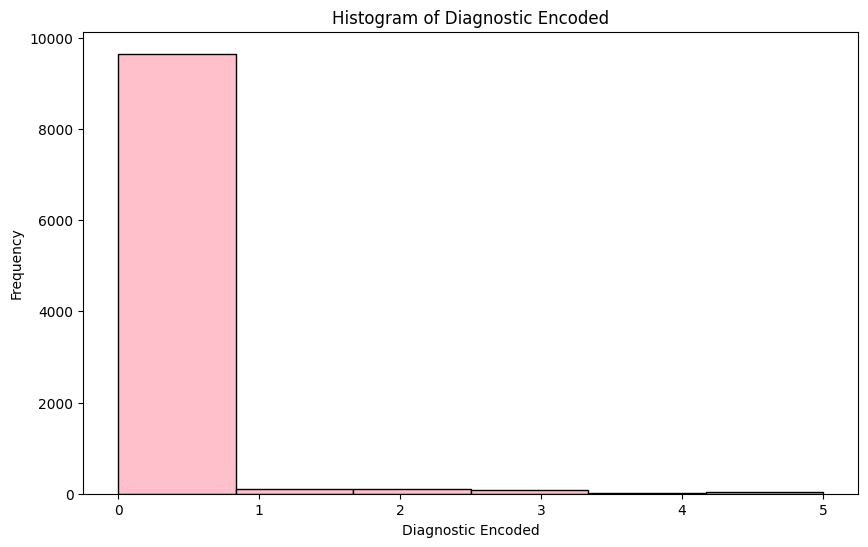

In [8]:
import matplotlib.pyplot as plt

# Count occurrences of each diagnostic
diagnostic_counts = df['Diagnostic_encoded'].value_counts()

# Calculate percentages
diagnostic_percentages = (diagnostic_counts / len(df)) * 100

# Print counts and percentages
print("Diagnostic Counts and Percentages:")
for diagnostic, count in diagnostic_counts.items():
    percentage = diagnostic_percentages[diagnostic]
    print(f"Diagnostic {diagnostic}: Count = {count}, Percentage = {percentage:.2f}%")


# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Diagnostic_encoded'], bins=len(diagnostic_counts), edgecolor='black',color='Pink')
plt.xlabel('Diagnostic Encoded')
plt.ylabel('Frequency')
plt.title('Histogram of Diagnostic Encoded')
plt.xticks(list(diagnostic_counts.index))  # Set x-axis ticks to diagnostic encoded values
plt.show()


In [9]:
df.isnull().sum()

,0
UDI,0
Date,0
System,0
Control,0
Product ID,0
Type,0
Air temperature (K),0
Process temperature (K),0
Rotational speed (rpm),0
Torque (Nm),0


In [10]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Separate features (X) and target (y)
X = df[numerical_cols].drop(['Diagnostic_encoded'], axis=1, errors='ignore')
y = df['Diagnostic_encoded']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# --- Print class distribution with percentages ---
print("Class Distribution Before SMOTE:")
for class_label, count in Counter(y).items():
    percentage = (count / len(y)) * 100
    print(f"Class {class_label}: Count = {count}, Percentage = {percentage:.2f}%")

print("\nClass Distribution After SMOTE:")
for class_label, count in Counter(y_resampled).items():
    percentage = (count / len(y_resampled)) * 100
    print(f"Class {class_label}: Count = {count}, Percentage = {percentage:.2f}%")

# Create a new balanced DataFrame
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['Diagnostic_encoded'] = y_resampled

Class Distribution Before SMOTE:
Class 0.0: Count = 9652, Percentage = 96.52%
Class 3.0: Count = 83, Percentage = 0.83%
Class 2.0: Count = 98, Percentage = 0.98%
Class 5.0: Count = 42, Percentage = 0.42%
Class 4.0: Count = 19, Percentage = 0.19%
Class 1.0: Count = 106, Percentage = 1.06%

Class Distribution After SMOTE:
Class 0.0: Count = 9652, Percentage = 16.67%
Class 3.0: Count = 9652, Percentage = 16.67%
Class 2.0: Count = 9652, Percentage = 16.67%
Class 5.0: Count = 9652, Percentage = 16.67%
Class 4.0: Count = 9652, Percentage = 16.67%
Class 1.0: Count = 9652, Percentage = 16.67%


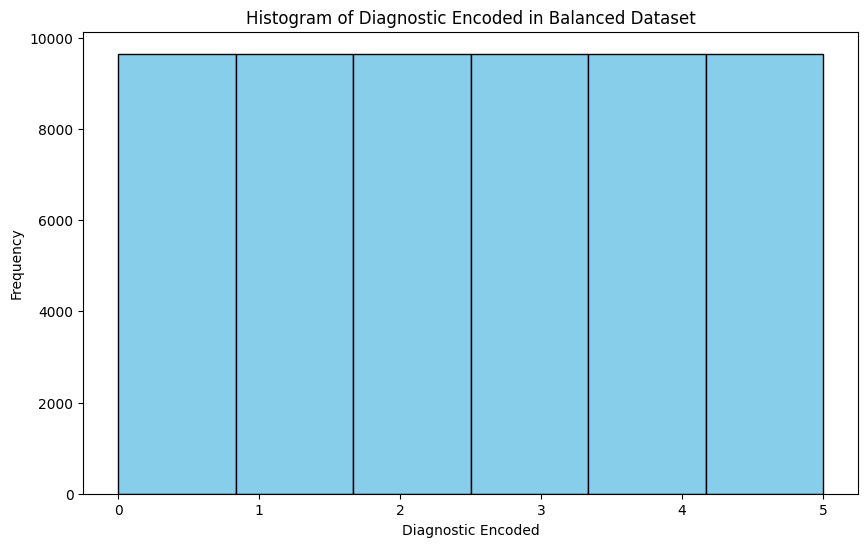

In [11]:

import matplotlib.pyplot as plt
import numpy as np
# Histogram of classes in diagnostic_encoded in df_balanced
plt.figure(figsize=(10, 6))
plt.hist(df_balanced['Diagnostic_encoded'], bins=len(np.unique(df_balanced['Diagnostic_encoded'])), edgecolor='black', color='skyblue')
plt.xlabel('Diagnostic Encoded')
plt.ylabel('Frequency')
plt.title('Histogram of Diagnostic Encoded in Balanced Dataset')
plt.xticks(list(np.unique(df_balanced['Diagnostic_encoded'])))  # Set x-axis ticks to diagnostic encoded values
plt.show()


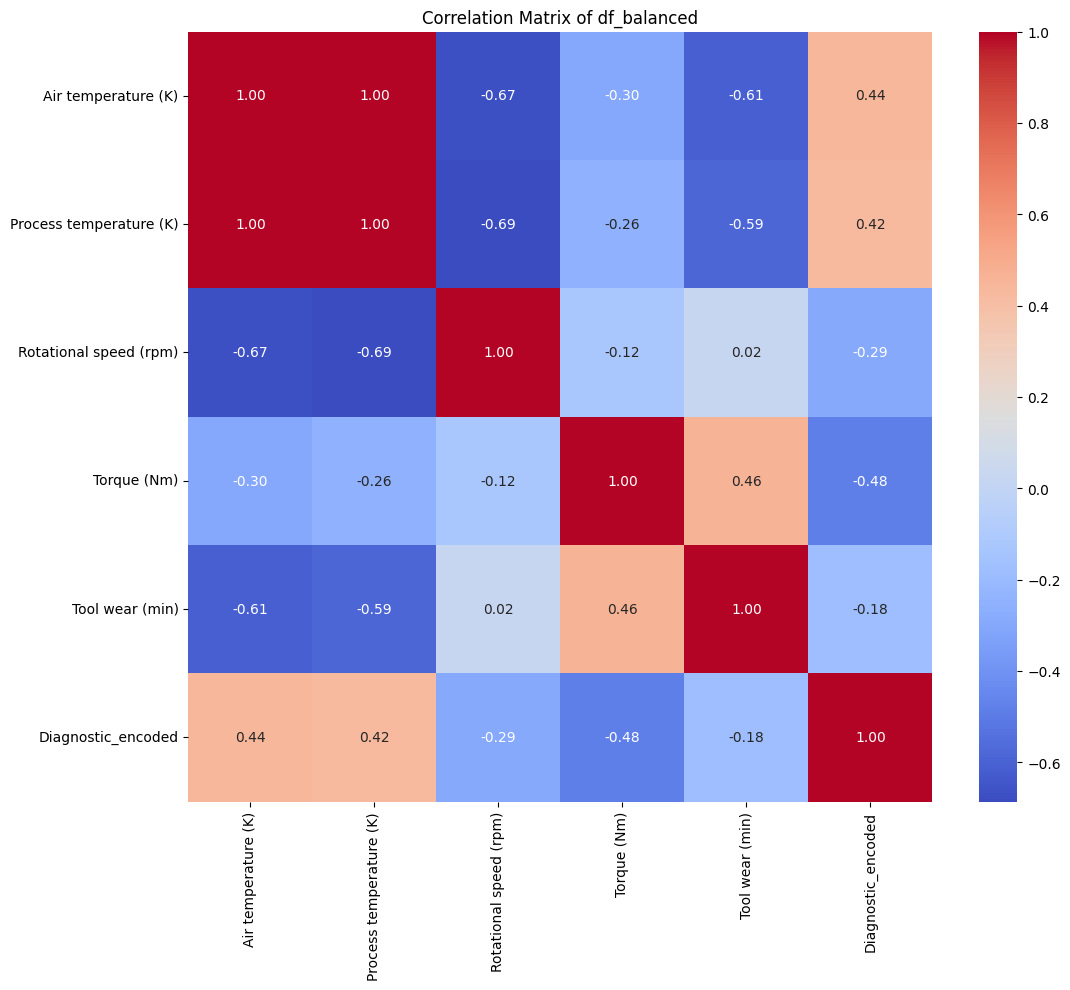

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
df_balanced = df_balanced.drop(['UDI','System'], axis=1) #Removed UDI and System as they were irrelevant.
# Calculate the correlation matrix
correlation_matrix = df_balanced.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of df_balanced')
plt.show()


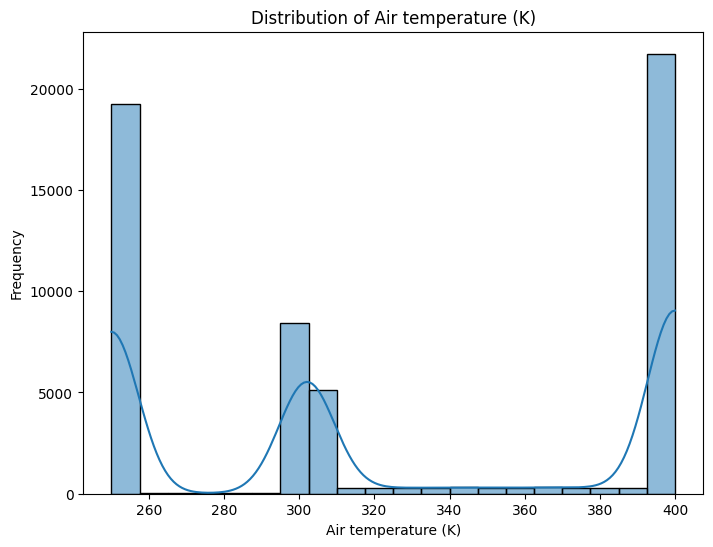

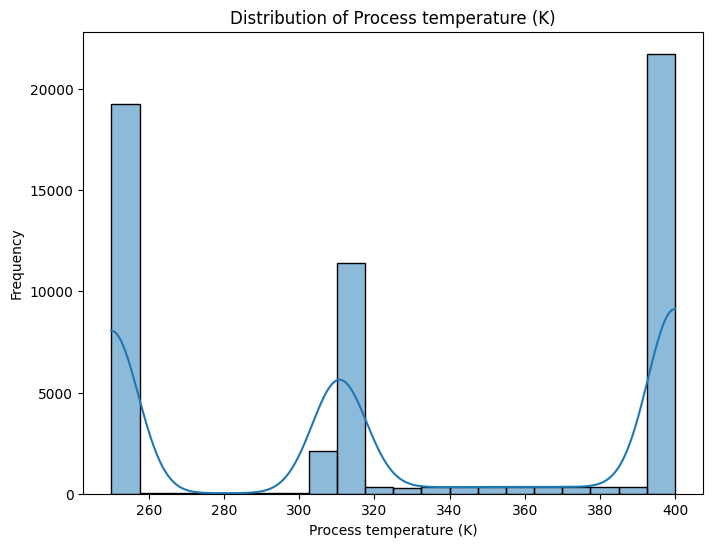

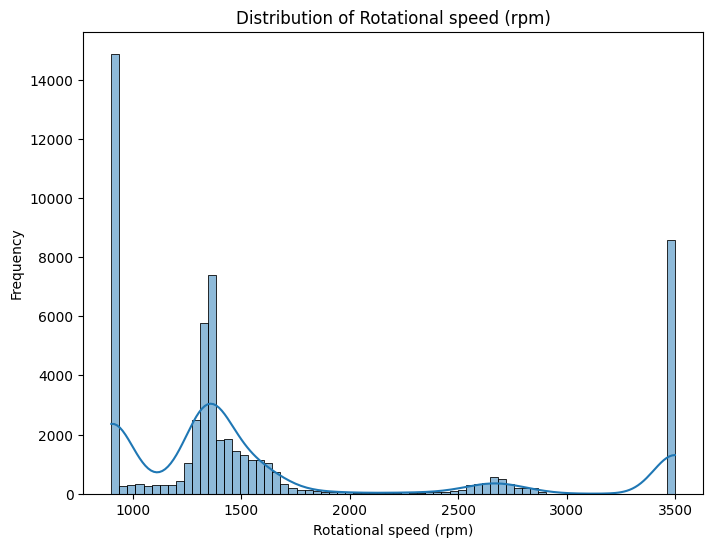

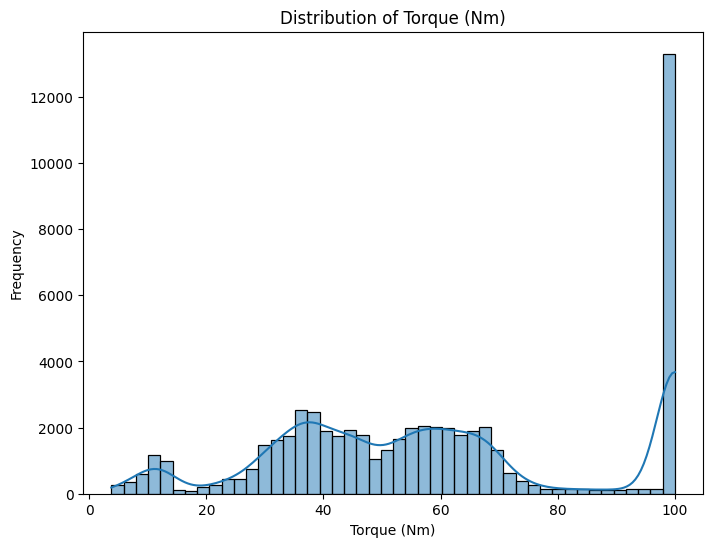

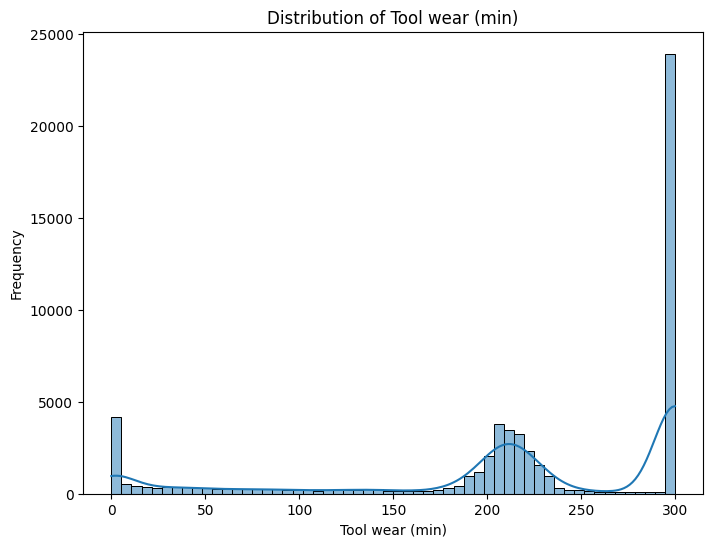

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in df_balanced.columns:
  if column != 'Diagnostic_encoded':
    plt.figure(figsize=(8, 6))
    sns.histplot(df_balanced[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


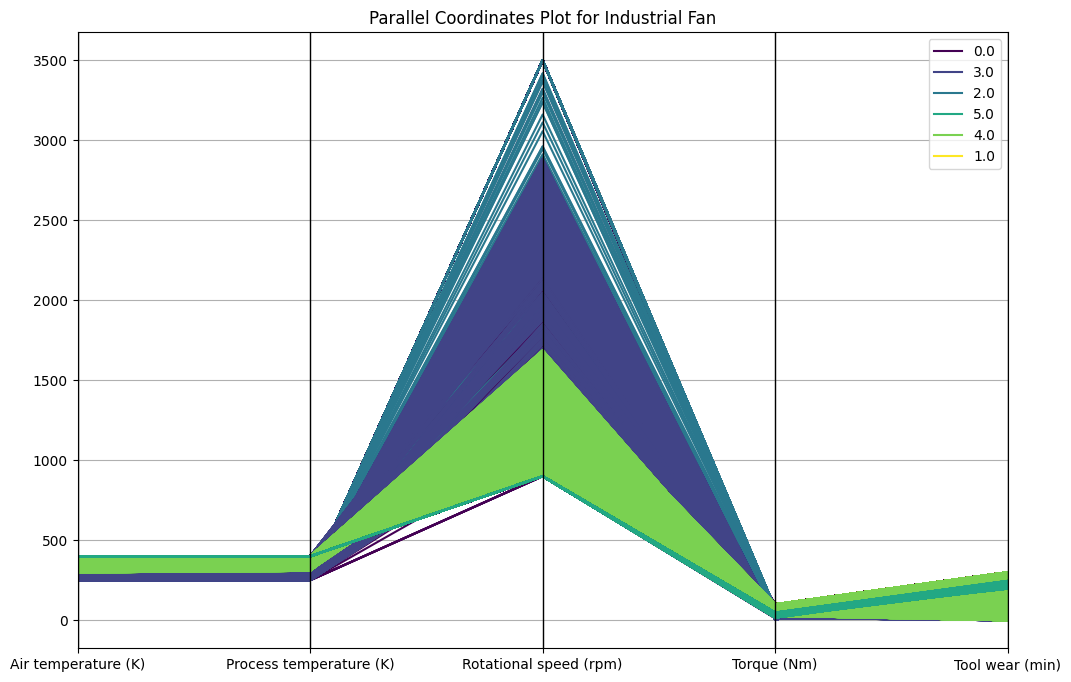

In [14]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(12, 8))
parallel_coordinates(df_balanced, 'Diagnostic_encoded', colormap='viridis')
plt.title('Parallel Coordinates Plot for Industrial Fan')
plt.show()

RPM sensors shows clear sep. Clear sep == high prediction power. Air temperature and process temperature show no gap whatsoever does they are redundant.

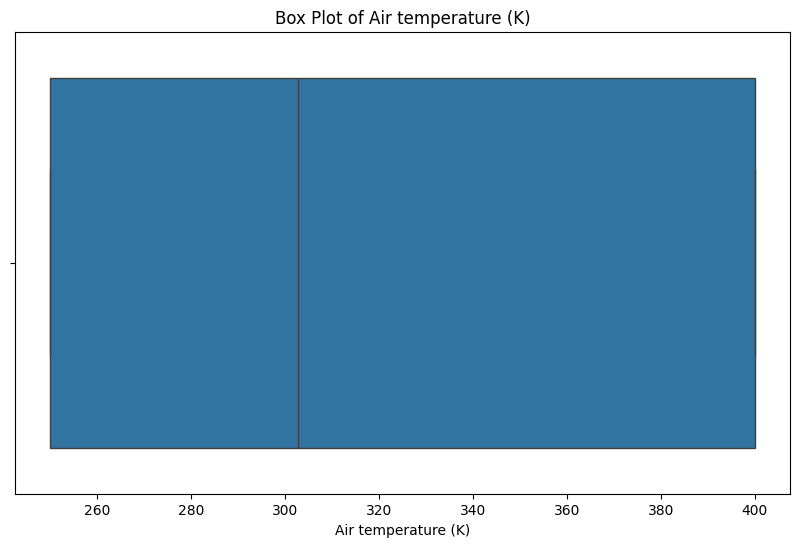

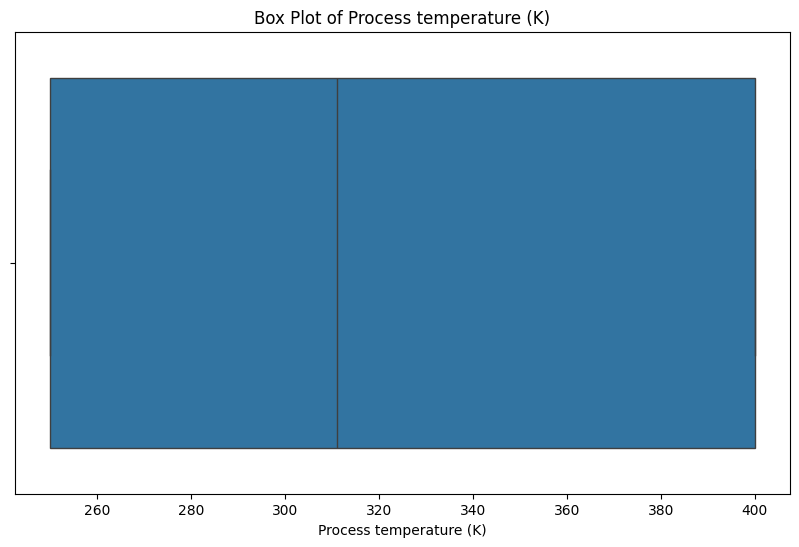

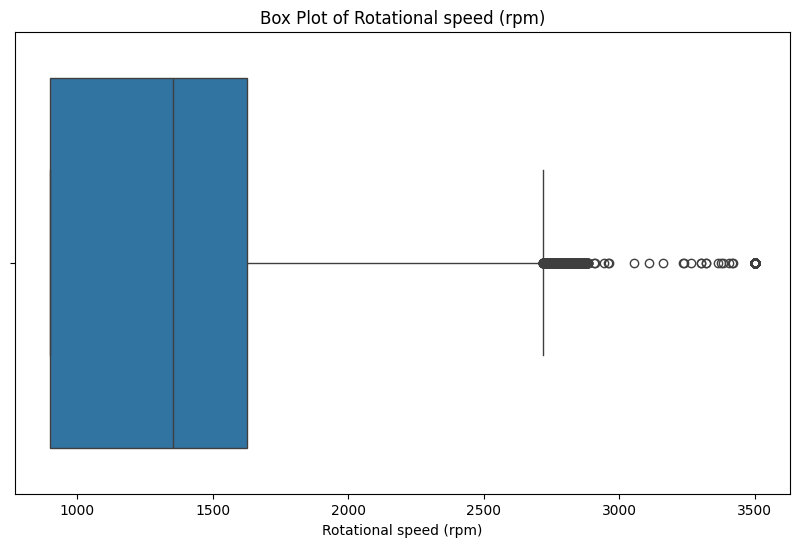

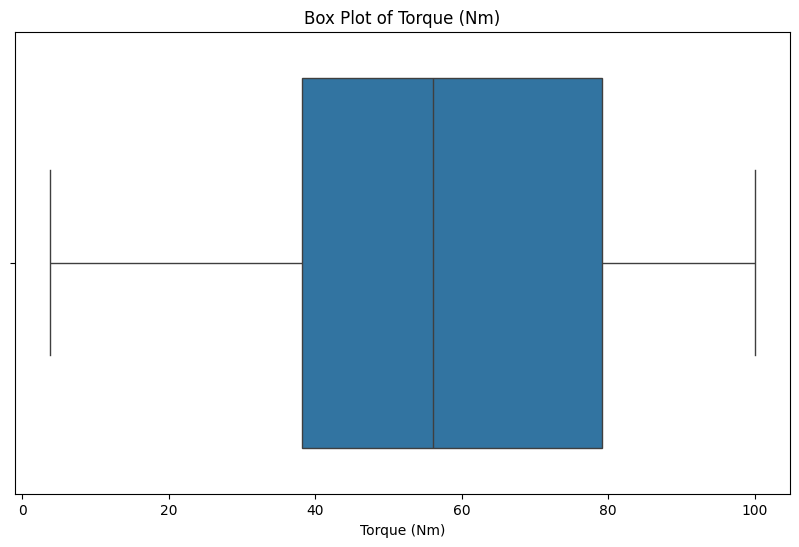

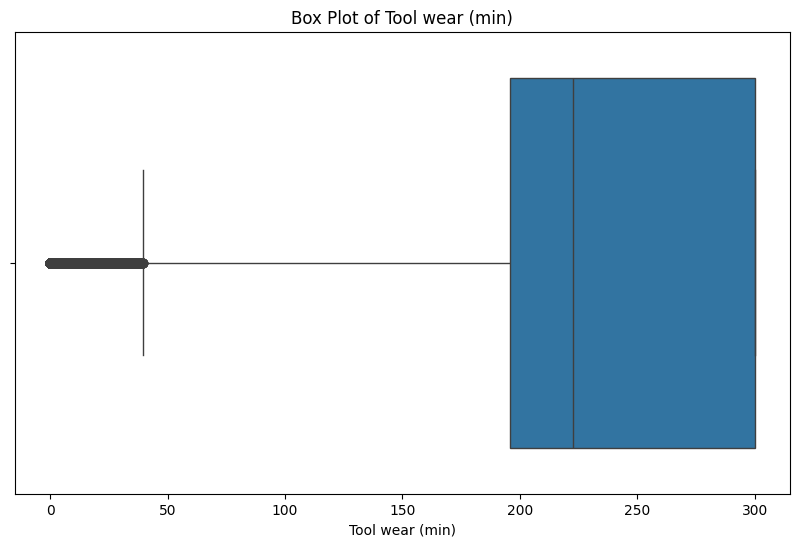

In [15]:


import matplotlib.pyplot as plt
# Create box plots for numerical features
for column in df_balanced.select_dtypes(include=['number']).columns:
  if column != 'Diagnostic_encoded':
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_balanced[column])
    plt.title(f"Box Plot of {column}")
    plt.show()


In [16]:
def calculate_iqr_outliers(df):
  """
  Calculates the IQR and counts outliers for numerical features in a DataFrame.

  Args:
    df: The DataFrame to analyze.

  Returns:
    A dictionary with feature names as keys and a tuple of (IQR, outlier_count) as values.
  """
  outlier_info = {}
  for column in df.select_dtypes(include=['number']).columns:
    if column != 'Diagnostic_encoded':  # Exclude the target variable
      Q1 = df[column].quantile(0.25)
      Q3 = df[column].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR
      outlier_count = len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])
      outlier_info[column] = (IQR, outlier_count)
  return outlier_info

# Calculate IQR and outlier counts for df_balanced
outlier_counts_df_balanced = calculate_iqr_outliers(df_balanced)


# Print the results
for feature, (IQR, outlier_count) in outlier_counts_df_balanced.items():
  print(f"Feature: {feature}, IQR: {IQR:.2f}, Outlier Count: {outlier_count}")


Feature: Air temperature (K), IQR: 150.00, Outlier Count: 0
Feature: Process temperature (K), IQR: 150.00, Outlier Count: 0
Feature: Rotational speed (rpm), IQR: 727.00, Outlier Count: 9595
Feature: Torque (Nm), IQR: 40.98, Outlier Count: 0
Feature: Tool wear (min), IQR: 104.24, Outlier Count: 6603


In [17]:
# Define the IQR range
Q1 = df_balanced[['Rotational speed (rpm)', 'Tool wear (min)']].quantile(0.25)
Q3 = df_balanced[['Rotational speed (rpm)', 'Tool wear (min)']].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_balanced = df_balanced[
    (df_balanced['Rotational speed (rpm)'] >= lower_bound['Rotational speed (rpm)']) &
    (df_balanced['Rotational speed (rpm)'] <= upper_bound['Rotational speed (rpm)']) &
    (df_balanced['Tool wear (min)'] >= lower_bound['Tool wear (min)']) &
    (df_balanced['Tool wear (min)'] <= upper_bound['Tool wear (min)'])
]

print(f"New dataset shape after outlier removal: {df_balanced.shape}")

New dataset shape after outlier removal: (41829, 6)


Using the removal method instead of Winsorization, because smart has expanded my data set, and there is less chances that the outliners contain any useful information.

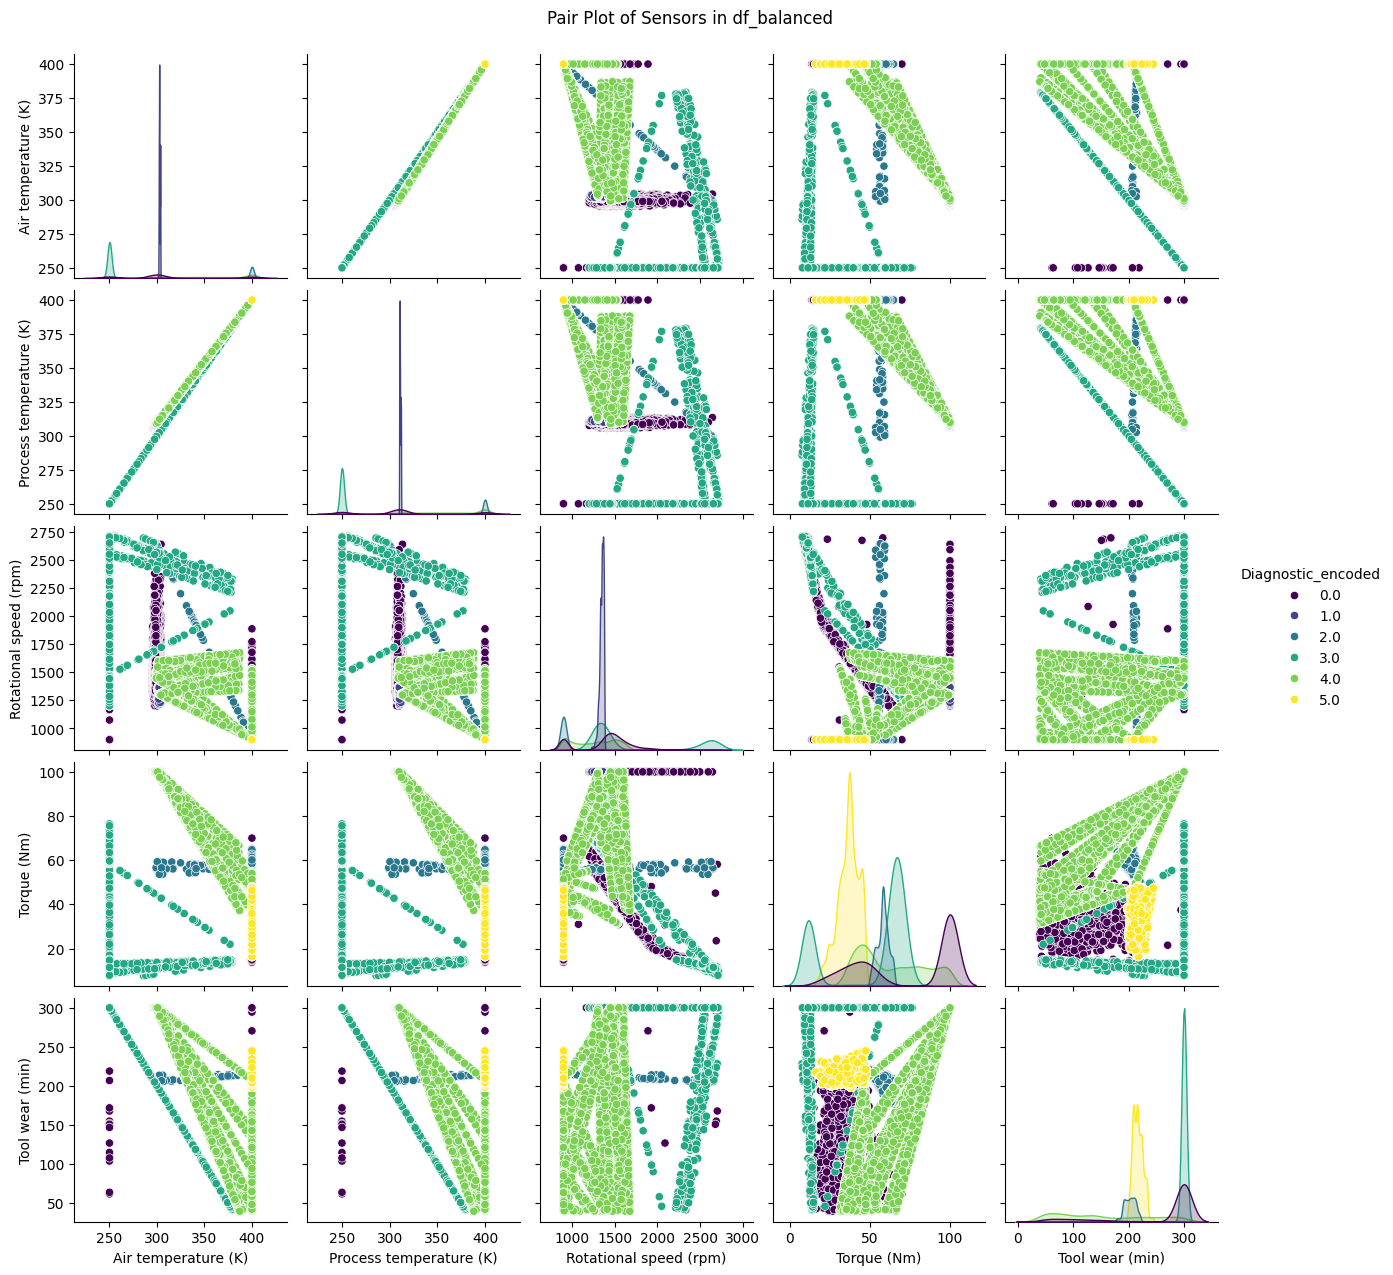

In [18]:

import matplotlib.pyplot as plt
# Create a pair plot for the sensors in df_balanced
sns.pairplot(df_balanced, hue='Diagnostic_encoded', diag_kind='kde', palette='viridis')
plt.suptitle('Pair Plot of Sensors in df_balanced', y=1.02)
plt.show()


In [19]:
df_balanced.head()

,Air temperature (K),Process temperature (K),Rotational speed (rpm),Torque (Nm),Tool wear (min),Diagnostic_encoded
1,298.2,308.7,1408.0,100.0,300.0,0.0
2,298.1,308.5,1498.0,100.0,300.0,0.0
12,250.0,250.0,1339.0,51.1,300.0,0.0
13,250.0,250.0,1742.0,30.0,300.0,0.0
14,250.0,250.0,2035.0,19.6,300.0,0.0


In [20]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_balanced.drop('Diagnostic_encoded', axis=1)
y = df_balanced['Diagnostic_encoded']

# Select numerical features
numerical_features = X.select_dtypes(include=['number']).columns

# Apply StandardScaler to numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Now X contains normalized numerical features


In [21]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df_balanced.drop(columns=['Diagnostic_encoded'])
y = df_balanced['Diagnostic_encoded']

# Split the data (80% train, 20% test) with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")

Training Set: (33463, 5), Test Set: (8366, 5)


In [24]:
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, StackingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

# Initialize individual models with multi-class handling
xgb = XGBClassifier(objective="multi:softmax", num_class=len(set(y_train)), eval_metric='mlogloss', use_label_encoder=False)
svm = SVC(probability=True, decision_function_shape="ovr")
lightgbm = LGBMClassifier(objective="multiclass", num_class=len(set(y_train)))
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='relu', solver='adam', max_iter=500)
hgb = HistGradientBoostingClassifier(loss="log_loss")
etc = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Voting Classifier
voting = VotingClassifier(estimators=[
    ('xgb', xgb), ('svm', svm), ('lightgbm', lightgbm), ('hgb', hgb)
], voting='soft')

# Stacking Classifier
stacking = StackingClassifier(estimators=[
    ('xgb', xgb), ('svm', svm), ('lightgbm', lightgbm), ('hgb', hgb)
], final_estimator=MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500))

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "XGBoost": xgb,
    "SVM": svm,
    "LightGBM": lightgbm,
    "MLP": mlp,
    "HistGradientBoosting": hgb,
    "ExtraTrees": etc,
    "Voting Classifier": voting,
    "Stacking Classifier": stacking
}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Calculate Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Print Results
    print(f"{name} Results:")
    print(f"Accuracy  = {accuracy:.4f}")
    print(f"Precision = {precision:.4f}")
    print(f"Recall    = {recall:.4f}")
    print(f"F1 Score  = {f1:.4f}")
    print("-" * 40)


Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:24:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results:
Accuracy  = 0.9929
Precision = 0.9930
Recall    = 0.9929
F1 Score  = 0.9929
----------------------------------------

Training SVM...
SVM Results:
Accuracy  = 0.8988
Precision = 0.8962
Recall    = 0.8988
F1 Score  = 0.8925
----------------------------------------

Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 33463, number of used features: 5
[LightGBM] [Info] Start training from score -1.953138
[LightGBM] [Info] Start training from score -1.466496
[LightGBM] [Info] Start training from score -2.817793
[LightGBM] [Info] Start training from score -1.582112
[LightGBM] [Info] Start training from score -2.02

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:25:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 33463, number of used features: 5
[LightGBM] [Info] Start training from score -1.953138
[LightGBM] [Info] Start training from score -1.466496
[LightGBM] [Info] Start training from score -2.817793
[LightGBM] [Info] Start training from score -1.582112
[LightGBM] [Info] Start training from score -2.029518
[LightGBM] [Info] Start training from score -1.466367
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Voting Classifier Results:
Accuracy  = 0.9944
Precision = 0.9944
Recall    = 0.9944
F1 Score  

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:27:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001865 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 33463, number of used features: 5
[LightGBM] [Info] Start training from score -1.953138
[LightGBM] [Info] Start training from score -1.466496
[LightGBM] [Info] Start training from score -2.817793
[LightGBM] [Info] Start training from score -1.582112
[LightGBM] [Info] Start training from score -2.029518
[LightGBM] [Info] Start training from score -1.466367
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:28:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:28:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:28:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:28:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:28:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 26770, number of used features: 5
[LightGBM] [Info] Start training from score -1.953071
[LightGBM] [Info] Start training from score -1.466449
[LightGBM] [Info] Start training from score -2.817903
[LightGBM] [Info] Start training from score -1.582170
[LightGBM] [Info] Start training from score -2.029674
[LightGBM] [Info] Start training from score -1.466287
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [In

In [26]:
from sklearn.metrics import accuracy_score

print("\nModel Performance on Test Set:")
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {accuracy:.4f}")


Model Performance on Test Set:
XGBoost: Accuracy = 0.9929
SVM: Accuracy = 0.8988
LightGBM: Accuracy = 0.9938
MLP: Accuracy = 0.9641
HistGradientBoosting: Accuracy = 0.9922
ExtraTrees: Accuracy = 0.9947
Voting Classifier: Accuracy = 0.9944
Stacking Classifier: Accuracy = 0.9950
